<a href="https://colab.research.google.com/github/talhaanwarch/DeftEval2020/blob/master/correlation%20analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!wget https://zenodo.org/record/1252141/files/EEGs_Nigeria.zip

--2020-03-21 19:48:02--  https://zenodo.org/record/1252141/files/EEGs_Nigeria.zip
Resolving zenodo.org (zenodo.org)... 188.184.95.95
Connecting to zenodo.org (zenodo.org)|188.184.95.95|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 276402063 (264M) [application/octet-stream]
Saving to: ‘EEGs_Nigeria.zip’

EEGs_Nigeria.zip    100%[===================>] 263.60M  8.08MB/s    in 32s     

2020-03-21 19:48:35 (8.28 MB/s) - ‘EEGs_Nigeria.zip’ saved [276402063/276402063]



In [0]:
!wget https://zenodo.org/record/1252141/files/EEGs_Guinea-Bissau.zip

--2020-03-21 19:48:37--  https://zenodo.org/record/1252141/files/EEGs_Guinea-Bissau.zip
Resolving zenodo.org (zenodo.org)... 188.184.95.95
Connecting to zenodo.org (zenodo.org)|188.184.95.95|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 153973086 (147M) [application/octet-stream]
Saving to: ‘EEGs_Guinea-Bissau.zip’

EEGs_Guinea-Bissau. 100%[===================>] 146.84M  11.3MB/s    in 15s     

2020-03-21 19:48:54 (9.50 MB/s) - ‘EEGs_Guinea-Bissau.zip’ saved [153973086/153973086]



In [0]:
import pandas as pd
import matplotlib.pyplot as plt


In [0]:
from zipfile import ZipFile 
data = ZipFile('EEGs_Nigeria.zip')
data.extractall()

In [0]:

from zipfile import ZipFile 
data = ZipFile('EEGs_Guinea-Bissau.zip')
data.extractall()

In [0]:
meta=pd.read_csv('https://zenodo.org/record/1252141/files/metadata_nigeria.csv')

EP_sub=meta['csv.file'][meta['Group']=='epilepsy']
CT_sub=meta['csv.file'][meta['Group']=='control']

Epilepsy=[]
for i in EP_sub:
  Epilepsy.append(pd.read_csv('EEGs_Nigeria/{}'.format(i), compression='gzip'))

Control=[]
for i in CT_sub:
  try:
    Control.append(pd.read_csv('EEGs_Nigeria/{}'.format(i), compression='gzip')) 
  except:
      pass

from scipy import signal
nyq = 0.5 * 128
l=0.3
low = l / nyq
high = 30 / nyq
b, a = signal.butter(3, [low,high], 'band')


EP_data_ng=[]
for EP in Epilepsy:
  data=EP.iloc[:,1:15].values
  EP_data_ng.append(signal.filtfilt(b, a, data.T).T)
CT_data_ng=[]
for CT in Control:
  data=CT.iloc[:,1:15].values
  CT_data_ng.append(signal.filtfilt(b, a, data.T).T)

In [0]:
meta=pd.read_csv('https://zenodo.org/record/1252141/files/metadata_guineabissau.csv')
EP_sub=meta['subject.id'][meta['Group']=='Epilepsy']
CT_sub=meta['subject.id'][meta['Group']=='Control']
Epilepsy=[]
for i in EP_sub:
  Epilepsy.append(pd.read_csv('EEGs_Guinea-Bissau/signal-{}.csv.gz'.format(i), compression='gzip'))

Control=[]
for i in CT_sub:
  Control.append(pd.read_csv('EEGs_Guinea-Bissau/signal-{}.csv.gz'.format(i), compression='gzip'))

from scipy import signal
nyq = 0.5 * 128
l=0.3
low = l / nyq
high = 30 / nyq
b, a = signal.butter(3, [low,high], 'band')

EP_data_gb=[]
for EP in Epilepsy:
  data=EP.iloc[:,1:15].values
  EP_data_gb.append(signal.filtfilt(b, a, data.T).T)


CT_data_gb=[]
for CT in Control:
  data=CT.iloc[:,1:15].values
  CT_data_gb.append(signal.filtfilt(b, a, data.T).T)

In [0]:

import numpy as np
X1_ng=np.concatenate(CT_data_ng)
X2_ng=np.concatenate(EP_data_ng)
X_ng=np.concatenate((X1_ng,X2_ng))
X_ng.shape

(7342592, 14)

In [0]:

import numpy as np
X1_gb=np.concatenate(CT_data_gb)
X2_gb=np.concatenate(EP_data_gb)
X_gb=np.concatenate((X1_gb,X2_gb))
X_gb.shape

(3850368, 14)

In [0]:
channels=['AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6', 'F4', 'F8', 'AF4']
dfc_gb = pd.DataFrame.from_records(X1_gb)
dfc_gb.columns=channels
dfc_gb.shape

(1788032, 14)

In [0]:
channels=['AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6', 'F4', 'F8', 'AF4']
dfe_gb = pd.DataFrame.from_records(X2_gb)
dfe_gb.columns=channels
dfe_gb.shape

(2062336, 14)

In [0]:
channels=['AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6', 'F4', 'F8', 'AF4']
dfc_ng = pd.DataFrame.from_records(X1_ng)
dfc_ng.columns=channels
dfc_ng.shape

(3173248, 14)

In [0]:
channels=['AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6', 'F4', 'F8', 'AF4']
dfe_ng = pd.DataFrame.from_records(X2_ng)
dfe_ng.columns=channels
dfe_ng.shape

(4169344, 14)

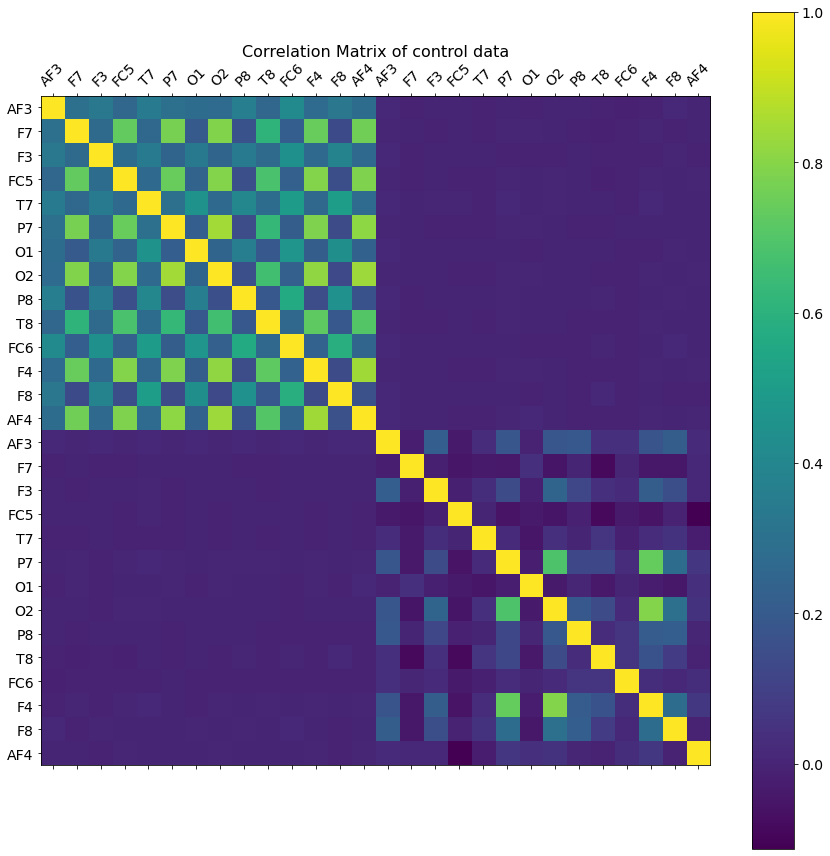

In [0]:
control_corr = pd.concat([dfc_gb, dfc_ng], axis=1).corr()
f = plt.figure(figsize=(15, 15))
plt.matshow(control_corr, fignum=f.number)
plt.xticks(range(control_corr.shape[1]), control_corr.columns, fontsize=14, rotation=45)
plt.yticks(range(control_corr.shape[1]), control_corr.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix of control data', fontsize=16);

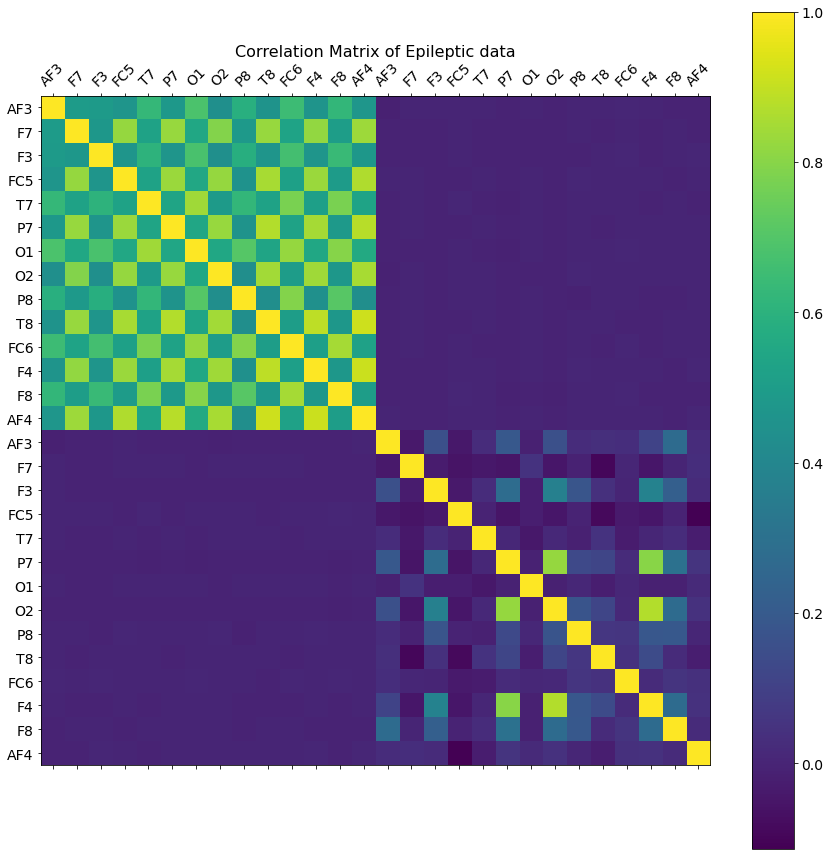

In [0]:
epilepsy_corr = pd.concat([dfe_gb, dfe_ng], axis=1).corr()
f = plt.figure(figsize=(15, 15))
plt.matshow(epilepsy_corr, fignum=f.number)
plt.xticks(range(epilepsy_corr.shape[1]), epilepsy_corr.columns, fontsize=14, rotation=45)
plt.yticks(range(epilepsy_corr.shape[1]), epilepsy_corr.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix of Epileptic data', fontsize=16);

In [0]:
import itertools

In [0]:
Ct_gb=[]
for i in CT_data_gb:
  if i.shape[0]>30000:
      Ct_gb.append(i[0:30000,0:14])
  else:
    pass
Ep_gb=[]
for i in EP_data_gb:
  if i.shape[0]>30000:
    Ep_gb.append(i[0:30000,0:14])
  else:
    pass

In [0]:
np.dstack(Ct_gb).shape

(30000, 14, 46)

In [0]:
Ct_ng=[]
for i in CT_data_ng:
  if i.shape[0]>30000:
     Ct_ng.append(i[0:30000,0:14])
  else:
    pass
Ep_ng=[]
for i in EP_data_ng:
  if i.shape[0]>30000:
     Ep_ng.append(i[0:30000,0:14])
  else:
    pass

In [0]:
Ct_ng_avg=np.mean(np.dstack(Ct_ng),axis=2)
Ep_ng_avg=np.mean(np.dstack(Ep_ng),axis=2)
Ct_gb_avg=np.mean(np.dstack(Ct_gb),axis=2)
Ep_gb_avg=np.mean(np.dstack(Ct_gb),axis=2)



In [0]:
Ct_ng_avg.shape,Ep_ng_avg.shape,Ct_gb_avg.shape,Ep_gb_avg.shape

((30000, 14), (30000, 14), (30000, 14), (30000, 14))

In [0]:
channels=['AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6', 'F4', 'F8', 'AF4']
Ct_ng_avg = pd.DataFrame.from_records(Ct_ng_avg)
Ct_ng_avg.columns=channels
Ct_ng_avg.shape

(30000, 14)

In [0]:
channels=['AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6', 'F4', 'F8', 'AF4']
Ep_ng_avg = pd.DataFrame.from_records(Ep_ng_avg)
Ep_ng_avg.columns=channels
Ep_ng_avg.shape

(30000, 14)

In [0]:
channels=['AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6', 'F4', 'F8', 'AF4']
Ct_gb_avg = pd.DataFrame.from_records(Ct_gb_avg[:,0:90])
Ct_gb_avg.columns=channels
Ct_gb_avg.shape

(30000, 14)

In [0]:
channels=['AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6', 'F4', 'F8', 'AF4']
Ep_gb_avg = pd.DataFrame.from_records(Ep_gb_avg[:,0:90])
Ep_gb_avg.columns=channels
Ep_gb_avg.shape

(30000, 14)

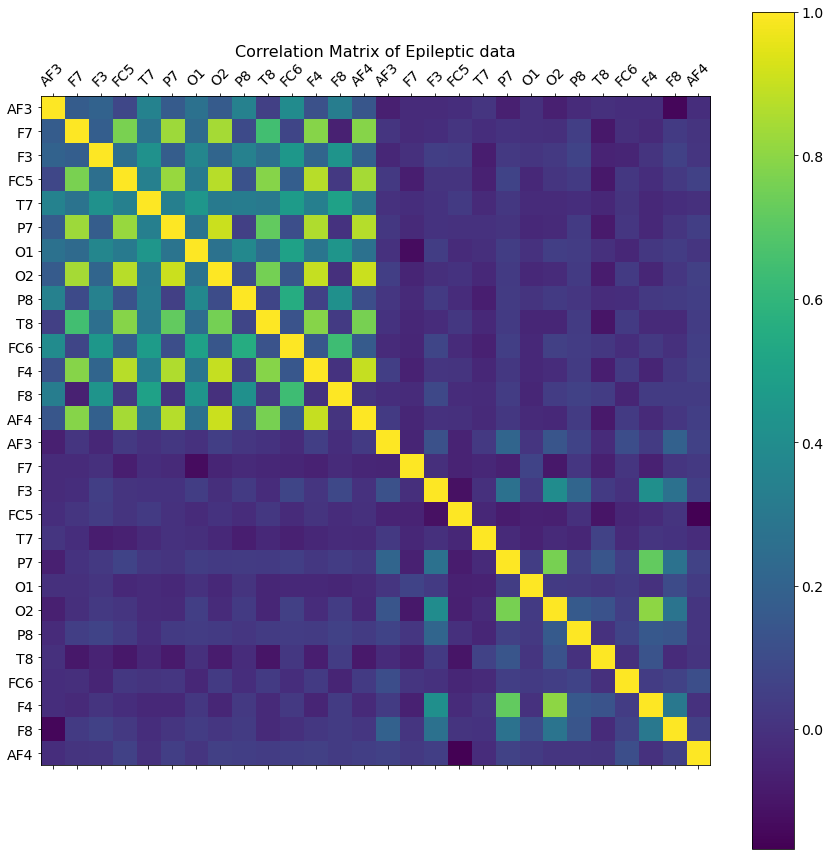

In [0]:
epilepsy_corr = pd.concat([Ep_gb_avg, Ep_ng_avg], axis=1).corr()
f = plt.figure(figsize=(15, 15))
plt.matshow(epilepsy_corr, fignum=f.number)
plt.xticks(range(epilepsy_corr.shape[1]), epilepsy_corr.columns, fontsize=14, rotation=45)
plt.yticks(range(epilepsy_corr.shape[1]), epilepsy_corr.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix of Epileptic data', fontsize=16);

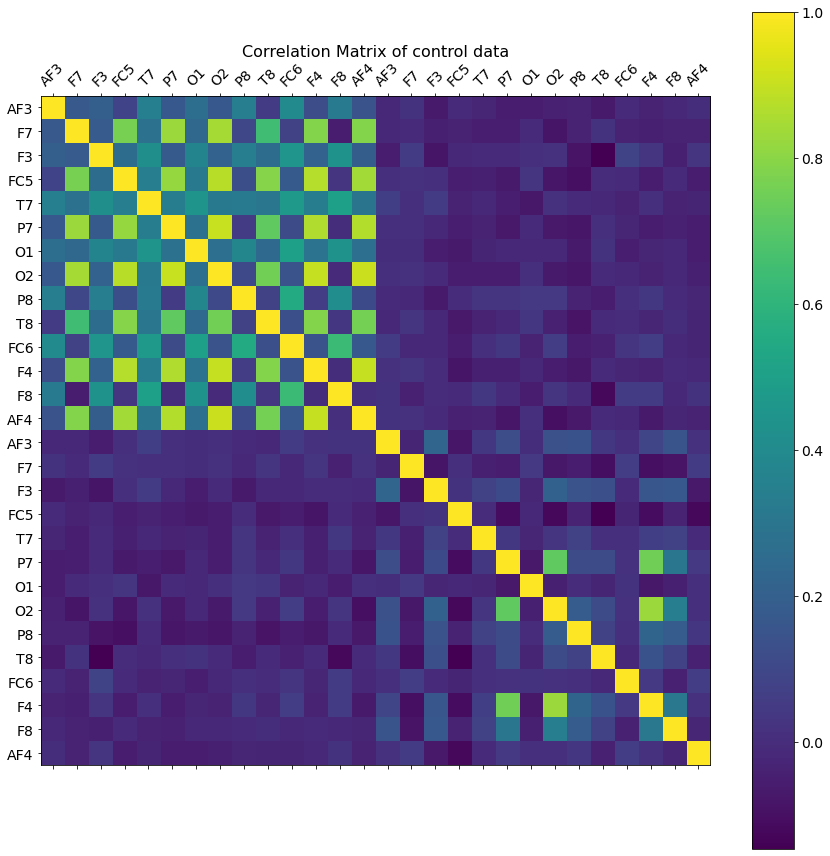

In [0]:
control_corr = pd.concat([Ct_gb_avg, Ct_ng_avg], axis=1).corr()
f = plt.figure(figsize=(15, 15))
plt.matshow(control_corr, fignum=f.number)
plt.xticks(range(control_corr.shape[1]), control_corr.columns, fontsize=14, rotation=45)
plt.yticks(range(control_corr.shape[1]), control_corr.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix of control data', fontsize=16);

In [0]:
Ct_ng[0].shape

(30000, 14)

In [0]:
Ct_ng_corr=[]
for i in Ct_ng